<a href="https://colab.research.google.com/github/ayush2444/PlayStore_Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

###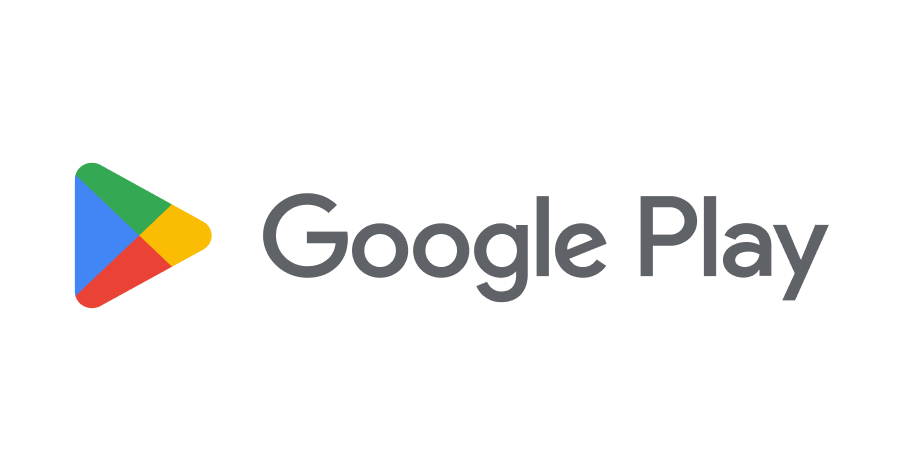

**<h1>Introduction</h1>**

The Google Play shop is the official distribution hub for Android apps and some other digital content, including music, movies, and books.

On the Google Play Store, there are more than 2.5 million applications. With the help of several Python packages, we will conduct a thorough research of the Android app industry.

We are now going to do exploratory data analysis project is to better understand consumer preferences in order to assist developers in making their products more well-known on the Play Store.

**<h1>Problems</h1>**



1. What are the most popular app categories in the Google Play store?
2. What type of Apps are most prevalent on the Play Store according to the  Content Rating column? 
3. how the data frame's ratings were distributed?
4. which type of category has the most number of ratings?
5. what are the top four Category which contain highest rating? 
6. Which category has the most no. of installations?
7. What are the Top 10 Installed Applications?
8. What type of category has the most heavy applications?
9. Which percentage of Play Store apps are free and paid?
10. how many number of apps are paid?
11. what are Top 10 expensive applications on playstore?
12. Does the price of an app affect its rating
13. How does the size of the app affect the ratings?
14. Now find out the relation between Price, Rating, Installs, Size, Reviews
15. What is the Type of review of sentiment distribution?
16. analyze the different review sentiment categories in percentage terms.
17. what are the Top 10 positive and negative reviews application?
18. How does sentiment polarity differ between paid and unpaid apps?








##Before starting make sure you have downloaded the dataset and placed it in the appropriate location.

**<h2>Importing Libraries<h2>**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

**<h1>Importing dataset</h1>**

In [30]:
# Playstore dataset
URL='https://drive.google.com/file/d/1pVZNhpwbqbu3xLf6J-1KrQI_-B8KqDCt/view?usp=share_link'
df=pd.read_csv('https://drive.google.com/uc?id='+URL.split('/')[-2])

In [31]:
# User review dataset 
URL='https://drive.google.com/file/d/1zJmyrNtkv_ZnVAY1wtg1irTRbpoZ9rRH/view?usp=share_link'
reviews_df=pd.read_csv('https://drive.google.com/uc?id='+URL.split('/')[-2])

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:


df.shape

(10841, 13)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [32]:
## Play Store App Data
print("The length of the Playstore_data is",len(df))
print("The number of unique Apps in Playstore_data is",df["App"].nunique())
print("The total number of rows and columns in Playstore_data is",df.shape)

The length of the Playstore_data is 10841
The number of unique Apps in Playstore_data is 9660
The total number of rows and columns in Playstore_data is (10841, 13)


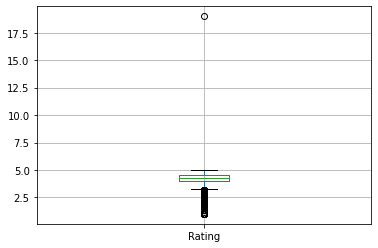

In [ ]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e119dd30>]],
      dtype=object)

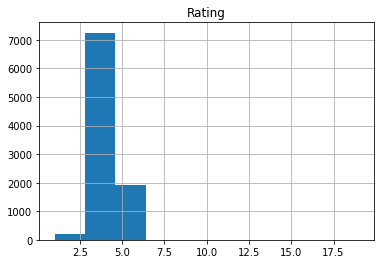

In [ ]:
df.hist()

**<h1>Handling the Null values</h2>**

In [ ]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [ ]:
# total number of null values
total_null = df.isnull().sum()

In [ ]:
Total = pd.DataFrame(index= df.columns)
Total['unique_values'] = df.nunique()
Total['null_values'] =df.isnull().sum()


In [ ]:
Total

,unique_values,null_values
App,9660,0
Category,34,0
Rating,40,1474
Reviews,6002,0
Size,462,0
Installs,22,0
Type,3,1
Price,93,0
Content Rating,6,1
Genres,120,0


**<h1>Dropping down all null values</h1>**

In [33]:
#drop down all the Null Values
df.dropna(how = 'any',inplace  =True)

In [34]:
#After removing null there are 8190 unique Apps avaliable
len(df['App'].unique())

8190

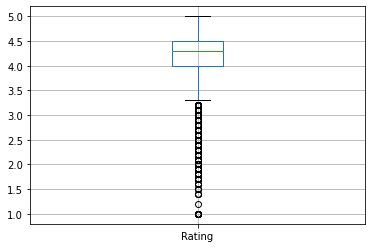

In [35]:
df.boxplot()

**<h1>Handling duplicate values</h1>**

In [36]:
print("the total number of unique App is ", len(df['App'].unique()))
print("the total number of App is  ", df.shape[0])
print('the total number of duplicate Apps is', len(df['App'])- len(df['App'].unique()))


the total number of unique App is  8190
the total number of App is   9360
the total number of duplicate Apps is 1170


In [37]:
# removing all the duplicate values 
df.drop_duplicates(subset = 'App' , inplace = True)

In [38]:

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**<h1>Changing the values in the "Installs," "Reviews," "Price," and "Size" columns to numbers</h1>**

---



In [39]:
# converting Installs column into integer
df = df[~(df['Installs'] == "Free")].reset_index(drop=True)

df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].astype(dtype = 'int')

In [40]:
#Converting reviews column into Integer
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace(',',''))
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('+',''))
df['Reviews'] = df['Reviews'].astype(dtype = 'int')

In [41]:
#Converting the Size column into float
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))


In [42]:
#converting the Price column into float
df['Price']=df['Price'].apply( lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))



In [28]:

df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**<h1>Exploring UserReview_DataFrame</h1>**

In [ ]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#checking Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews_df.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


In [ ]:
# checking the total number of null values
reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
get_rows=reviews_df.shape[0]
get_columns=reviews_df.shape[1]
print(f"there are total number of {get_rows} rows  and no of columns is {get_columns}")

there are total number of 64295 and no of columns is 5


In [ ]:
Total=pd.DataFrame(index=reviews_df.columns)
Total["non null values"]=reviews_df.count()
Total["unique count"]=reviews_df.nunique()
Total["null value"]=reviews_df.isnull().sum()


In [ ]:
Total

,non null values,unique count,null value
App,64295,1074,0
Translated_Review,37427,27994,26868
Sentiment,37432,3,26863
Sentiment_Polarity,37432,5410,26863
Sentiment_Subjectivity,37432,4474,26863


In [ ]:
df.shape

(64295, 5)

In [43]:
#lets Drop down all the Null values 
droping_null = reviews_df.dropna(inplace= True)


In [ ]:
##After droping down the null values.
reviews_df.shape

(37427, 5)

In [ ]:
reviews_df.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
64222,False,False,False,False,False
64223,False,False,False,False,False
64226,False,False,False,False,False
64227,False,False,False,False,False


**<h1>Exploratory Data Analysis</h1>**

**<h3>What are the most popular app categories in the Google Play store?</h3>**

In [ ]:
Cat_analysis = df['Category'].value_counts().reset_index()
Cat_analysis.T

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
index,FAMILY,GAME,TOOLS,FINANCE,PRODUCTIVITY,LIFESTYLE,PERSONALIZATION,MEDICAL,BUSINESS,PHOTOGRAPHY,...,FOOD_AND_DRINK,AUTO_AND_VEHICLES,WEATHER,LIBRARIES_AND_DEMO,HOUSE_AND_HOME,ART_AND_DESIGN,COMICS,PARENTING,EVENTS,BEAUTY
Category,1607,912,717,302,301,301,296,290,263,263,...,94,73,72,63,62,60,54,50,45,42


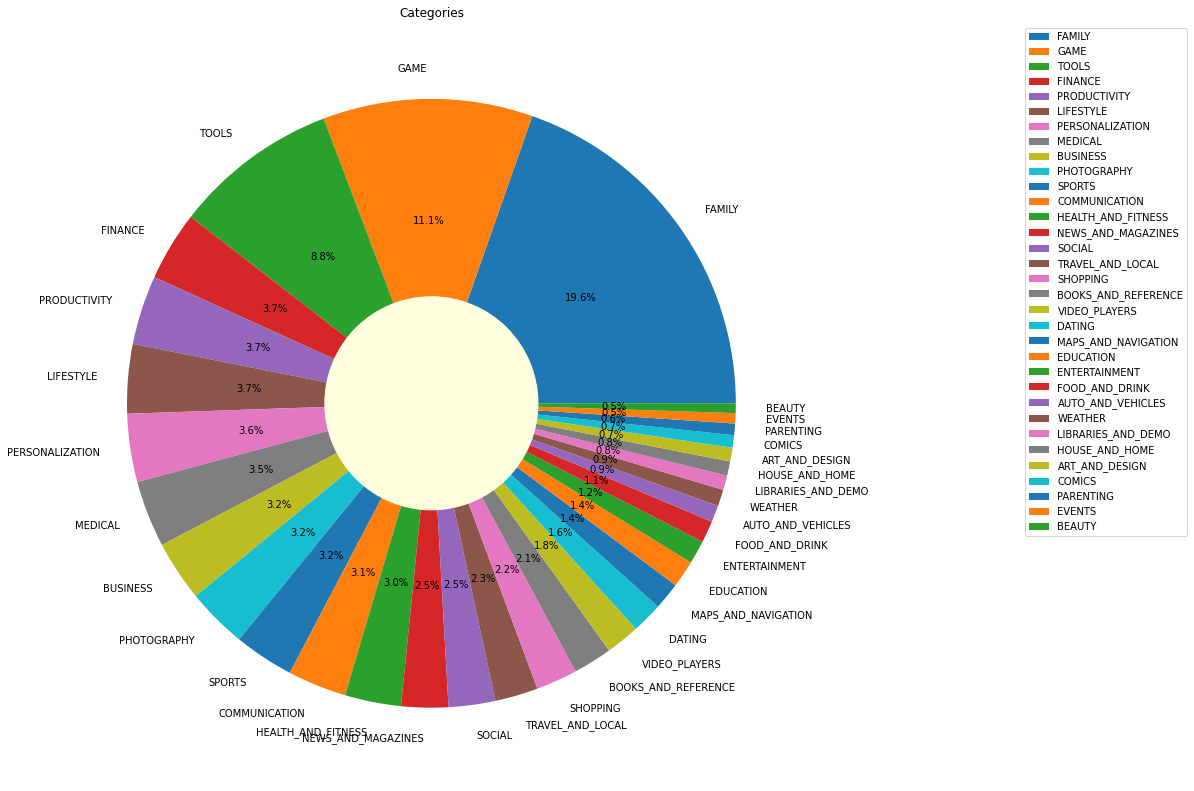

In [ ]:
# creating a pie chart to check the popular category Apps
plt.figure(figsize=(14,14))
ax = plt.subplot(111)
gol_pie = plt.Circle( (0,0), 0.35, color='lightyellow')
ay=plt.gcf()
ay.gca().add_artist(gol_pie)
plt.pie(x = Cat_analysis['Category'], labels= Cat_analysis['index'], autopct ='%1.1f%%')
plt.legend(title = 'Categories')
ax.set_title("Categories")
ax.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

*33 categories in total make up the dataset, with Family Game & tools being where the majority of the apps are located in the Play Store.*

**<h2>Content Rating Analysis</h2>**

In [ ]:
Cont_ratingx = df['Content Rating'].value_counts().index
Cont_ratingy = df['Content Rating'].value_counts()

In [ ]:
Cont_ratingy

Everyone           6612
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

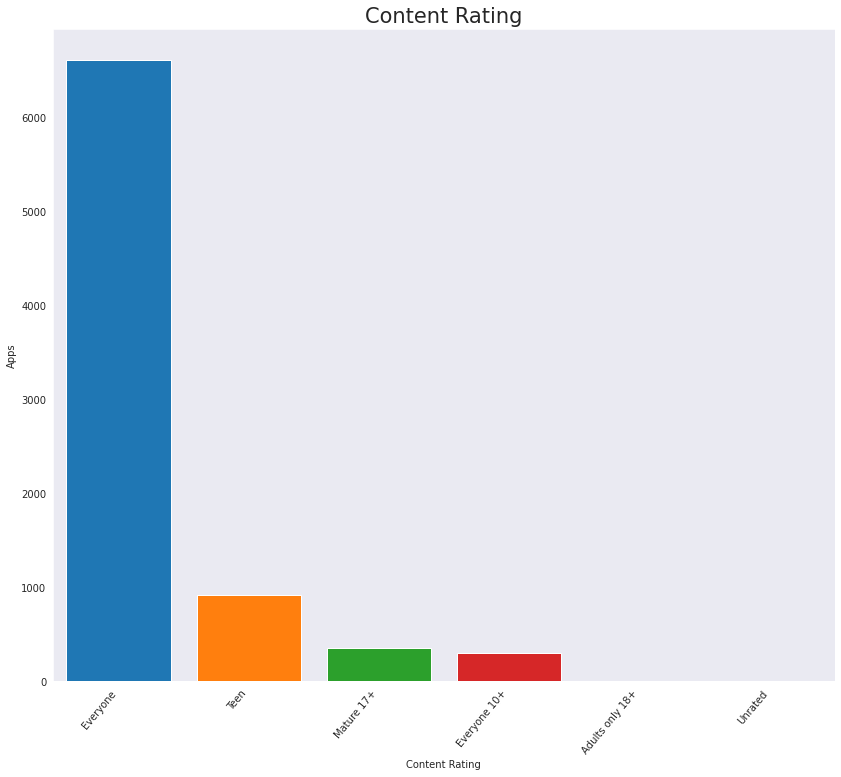

In [ ]:
#create the bar chart to observe the content rating
plt.figure(figsize=(14,12))
ax = sns.barplot(x = Cont_ratingx ,y = Cont_ratingy, saturation = 10, orient= 'v')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.title('Content Rating',size = 21)
plt.ylabel('Apps')
plt.xlabel('Content Rating')
sns.set_style("dark")





*The (Everyone)category has the most apps, as can be seen from the graph*

**<h1>Rating Analysis </h1>**



**<h3>Let's examine how the data frame's ratings were distributed.</h3>**

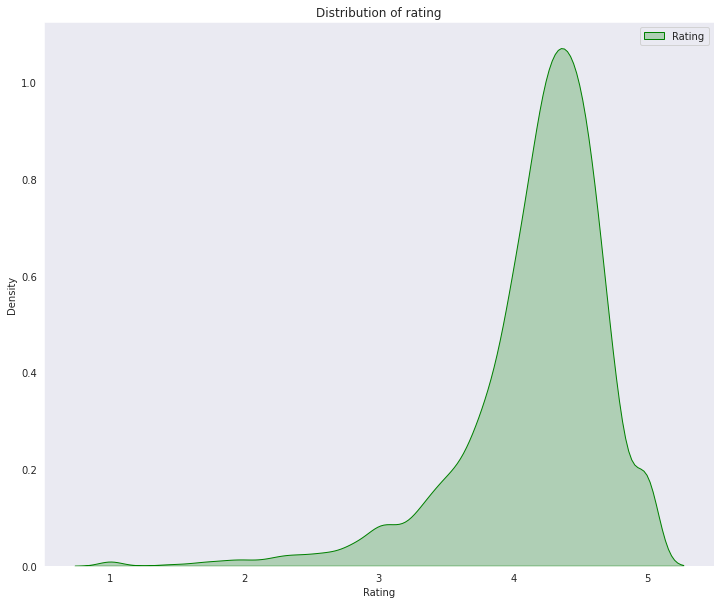

In [ ]:
#Rating Distribution
plt.figure(figsize=(12,10))
sns.kdeplot(df['Rating'], color  = 'green' , shade = True  )
plt.legend(['Rating'])
plt.title('Distribution of rating')
plt.show()


*According to the graph above, the majority of applications in the Google Play store have ratings between 3.5 and 4.8.*

**<h3>What Category of apps has the most ratings?</h3>**

In [ ]:
df[["Category", "Rating"]]

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
8185,FAMILY,4.0
8186,FAMILY,4.5
8187,FAMILY,5.0
8188,BOOKS_AND_REFERENCE,4.5


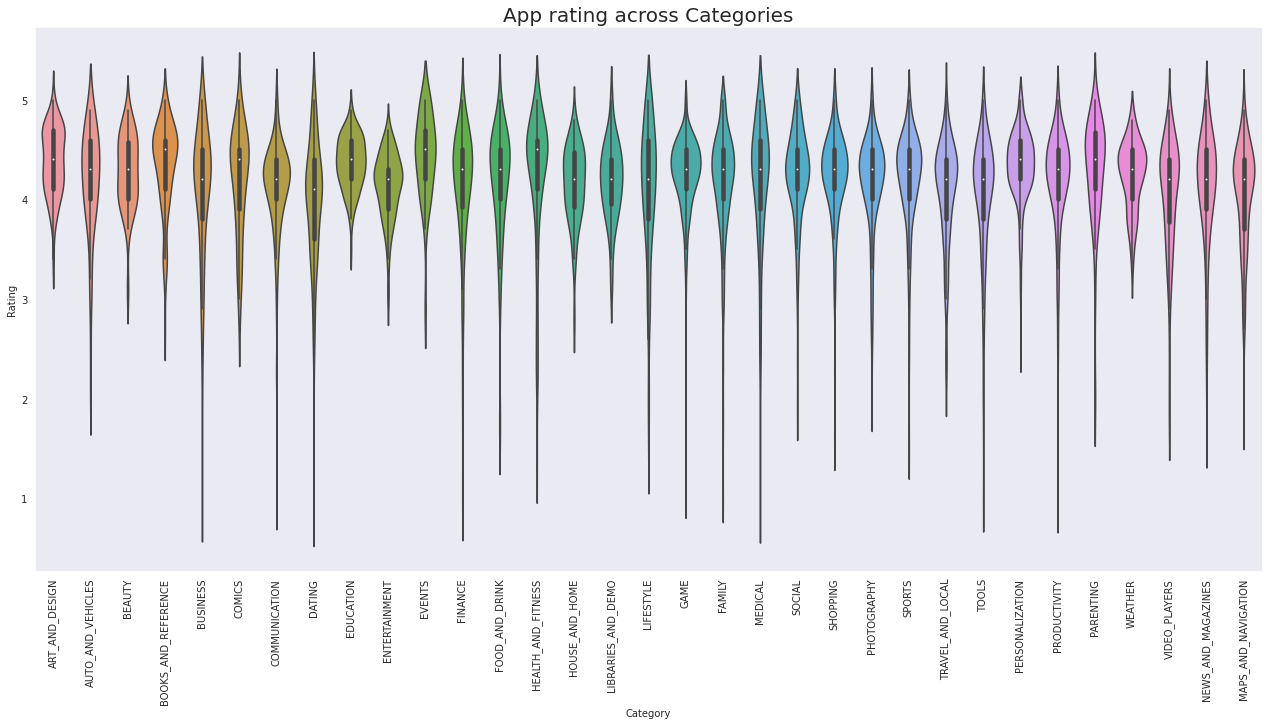

In [ ]:
## create the violinplot plot to anaslyse App rating category 
plt.figure(figsize= (22,10))
sns.set_style("dark")
plt.title('App rating across Categories' ,fontsize = 20)
ax = sns.violinplot(x = df['Category'], y = df['Rating'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

*According to the graph above, the two categories of applications with the greatest quality and 50% of apps with ratings greater than 4.5 are health and fitness and book and reference applications, while the dating category is lower than Average*

**<h3>What are the top four Category which contain highest rating?</h3>**

In [ ]:
# lets observe the Top four Category 
Top = df["Category"].value_counts().reset_index()
print(Top[:4])

     index  Category
0   FAMILY      1607
1     GAME       912
2    TOOLS       717
3  FINANCE       302


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

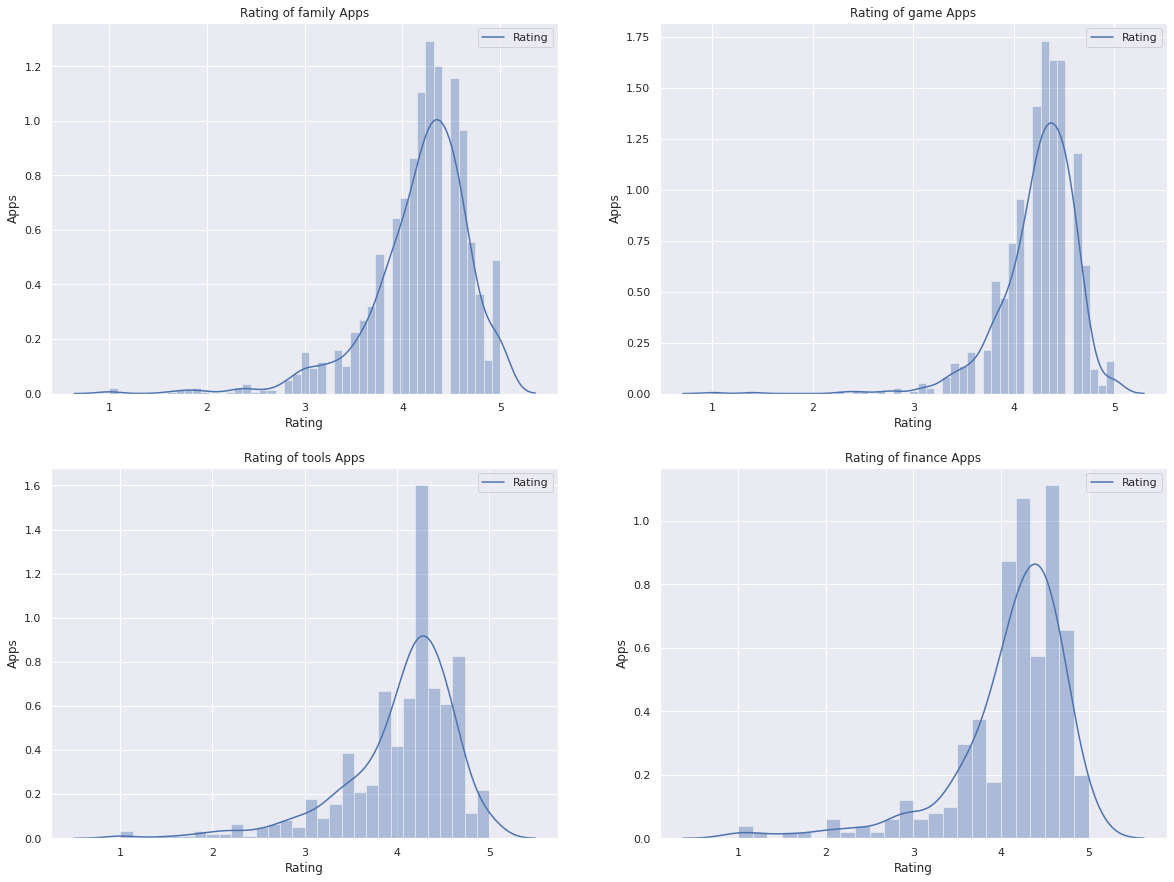

In [ ]:
plt.figure(figsize= (20,15))
plt.title("Ratings of Different Categories",fontsize = 20)

plt.subplot(2,2,1)
sns.distplot(df[df['Category'] == 'FAMILY']['Rating'])
plt.legend(['Rating'])
plt.ylabel("Apps")
plt.title('Rating of family Apps')

plt.subplot(2,2,2)
sns.distplot(df[df['Category'] == 'GAME']['Rating'])
plt.legend(['Rating'])
plt.ylabel("Apps")
plt.title('Rating of game Apps')

plt.subplot(2,2,3)
sns.distplot(df[df['Category'] == 'TOOLS']['Rating'])
plt.legend(['Rating'])
plt.ylabel("Apps")
plt.title('Rating of tools Apps')

plt.subplot(2,2,4)
sns.distplot(df[df['Category'] == 'FINANCE']['Rating'])
plt.legend(['Rating'])
plt.ylabel("Apps")
plt.title('Rating of finance Apps')

plt.show()

*According to the graph above, the family category has higher ratings between 3 to 5, games have between 3.5 to 4.8, tools have the greatest ratings between 3.8 to 4.9, and financial category applications have ratings between 3.6 and 5.*
it is concluded that all the top four category has average rating between 4 to 4.8 

**<h1>Installation Analysis</h1>**

**<h3>The Categories with the most installations and the ones with the heaviest apps?</h3>** 

In [ ]:
ay =df.groupby('Category')['Installs'].value_counts()

In [ ]:
Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
  
Installs_df

,Installs
Category,
GAME,13878762717
COMMUNICATION,11038241530
TOOLS,7999224500
PRODUCTIVITY,5793070180
SOCIAL,5487841475
PHOTOGRAPHY,4649143130
FAMILY,4427429590
VIDEO_PLAYERS,3926797200
TRAVEL_AND_LOCAL,2894859300


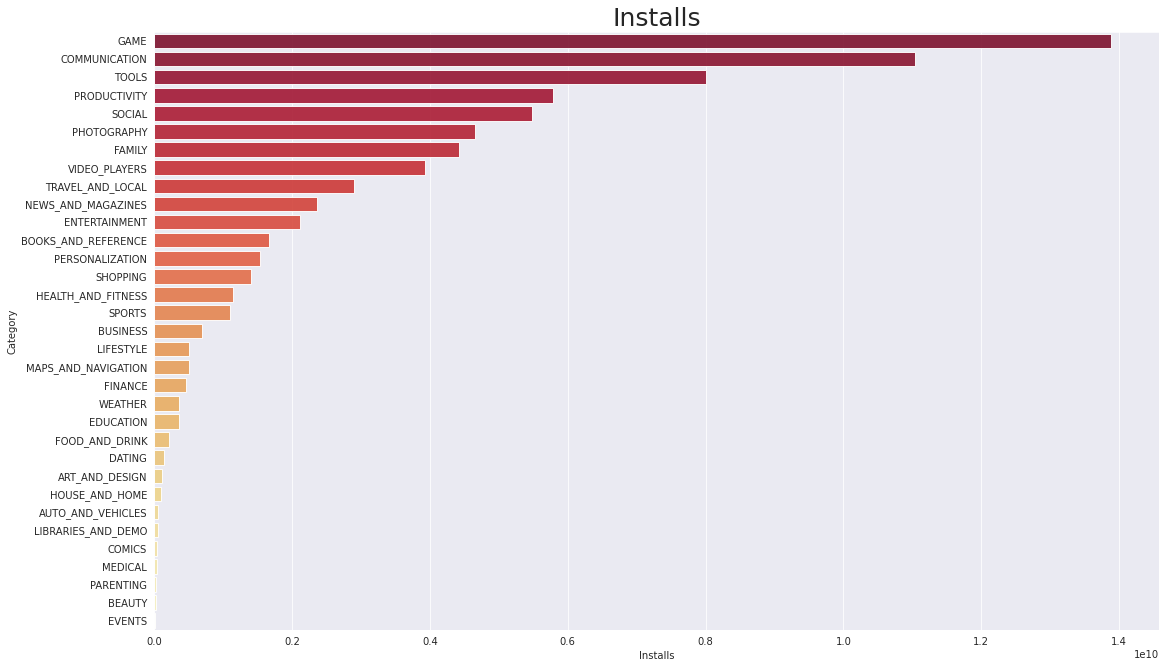

In [ ]:
# creating horizontal bar plot 
X_axis = []
Y_axis = []

## for loop
for axis in range(len(Installs_df)):
   X_axis.append(Installs_df.Installs[axis])
   Y_axis.append(Installs_df.index[axis])

plt.figure(figsize=(18,11))

plt.xlabel("Installs")
plt.ylabel("Category")
barplot = sns.barplot(x = X_axis , y = Y_axis, alpha =0.9, palette= "YlOrRd_r")
barplot.set_title("Installs", fontsize = 25);

*As we have seen from the above plot that (Game) , (communiucation) and (tools) category has the most number of installs*

**<h3>What are the Top 10 Installed Applications</h3>**



In [ ]:
top10 = df[df['Category'] == 'GAME'].max()
top10

In [ ]:
top10 = df[df['Category'] == 'GAME']
Top_most_intsalled = top10.sort_values(by='Installs', ascending=False).head(10)

[Text(0, 0, 'Subway Surfers'),
 Text(0, 0, 'Candy Crush Saga'),
 Text(0, 0, 'My Talking Tom'),
 Text(0, 0, 'Temple Run 2'),
 Text(0, 0, 'Pou'),
 Text(0, 0, 'ROBLOX'),
 Text(0, 0, 'Score! Hero'),
 Text(0, 0, 'Shadow Fight 2'),
 Text(0, 0, 'Talking Tom Gold Run'),
 Text(0, 0, 'Roll the Ball® - slide puzzle')]

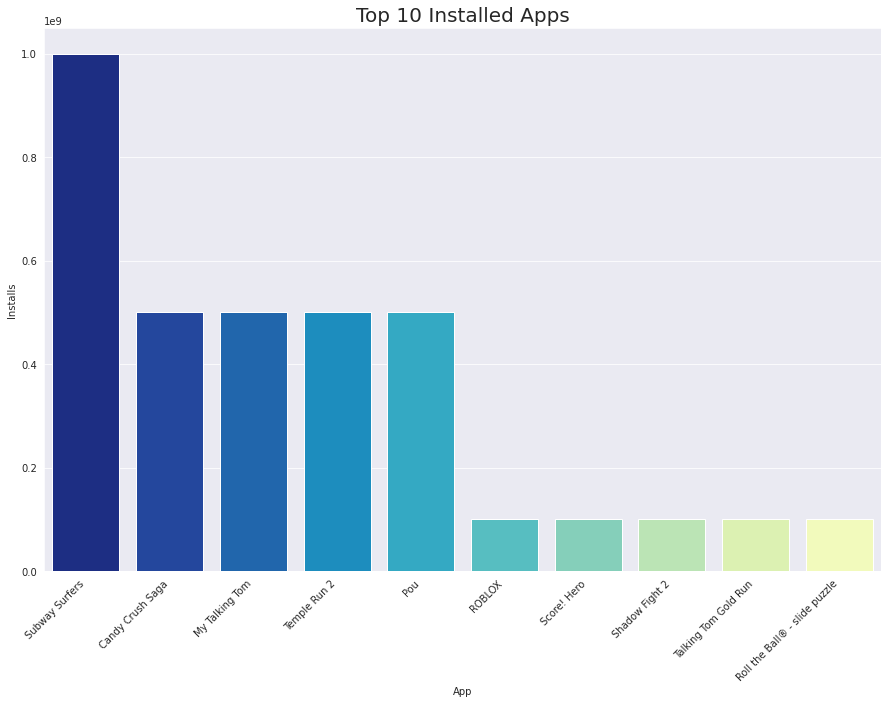

In [ ]:
## set figsize
plt.figure(figsize=(15,10))
##creating the bar plot
graph = sns.barplot(x = 'App', y = 'Installs', data =Top_most_intsalled ,palette = ("YlGnBu_r") , saturation = 10)
##set title
plt.title('Top 10 Installed Apps',size = 20)
##set Background style
sns.set_style('darkgrid') 
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, ha='right')

*As we have seen in the above bar chart , (Temple Run 2), (Candy Crush Saga), and (Subway Surfers) have the most number of  installations in the game category.*

**<h3>What are the most heavy category apps</h3>**

In [ ]:
high_size_app = df[df['Size']>50]
high_size_app.T


In [ ]:
heavy_app = high_size_app.groupby("Category",)["Size"].count().sort_values( ascending=False).reset_index()[:5]
heavy_app

,Category,Size
0,FAMILY,304
1,GAME,287
2,SPORTS,35
3,HEALTH_AND_FITNESS,24
4,SOCIAL,17


[Text(0, 0, 'FAMILY'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'SOCIAL')]

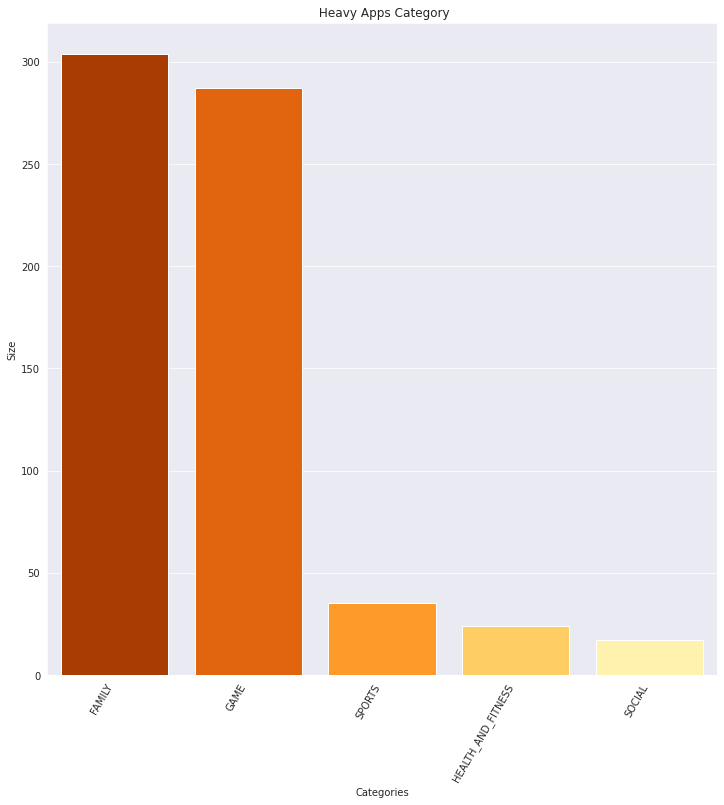

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x = "Category" , y = 'Size', data =heavy_app , palette = ("YlOrBr_r"), orient = 'v',saturation =10)
plt.title(' Heavy Apps Category')
sns.set_style('dark')
plt.xlabel('Categories')
plt.ylabel('Size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

*The majority of large Applications (>50MB) fall within the game and family Category.*

 **<h1>Pricing--Paid VS Free Analysis</h1>**

**<h3>Now let us look at the distribution of free and paid apps in the Google Play store</h3>**

In [ ]:
Index =df['Type'].value_counts(sort = True).index
Data = df['Type'].value_counts()

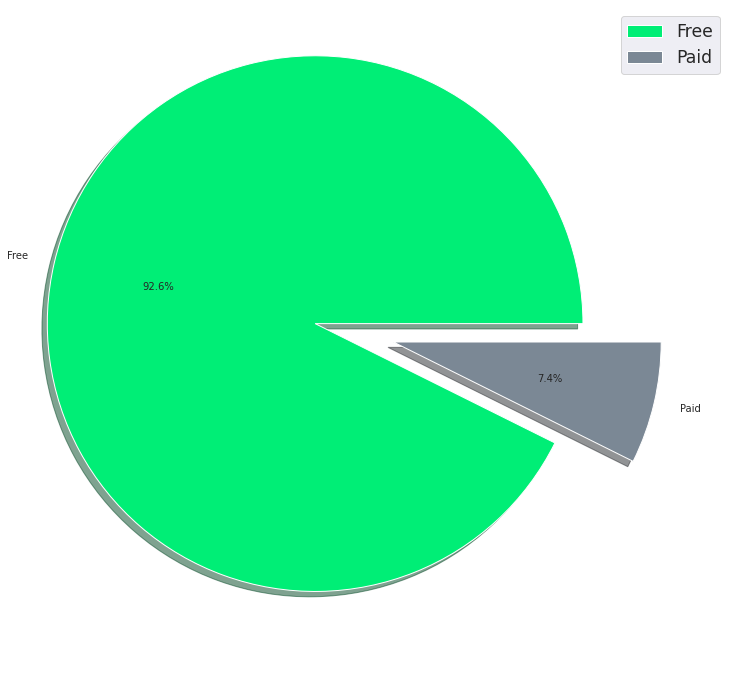

In [ ]:
## Creating pie chart 
plt.figure(figsize=(12,15))
colors =  ["#00EE76","#7B8895"]
explode =  (0.3,0)
plt.pie(Data, labels = Index , explode = explode, autopct ='%1.1f%%' , colors = colors , shadow = True ,startangle=0, radius=1.0)
plt.legend(fontsize = 'xx-large')

*As we can observe from the above graph that 92.6% of the apps in the Google Play store are free, while 7.4%% are paid.*

Install rates of free and premium apps compare? Even while the gap is not as pronounced as I had anticipated, it shows out that paid apps are installed far less frequently than free ones.

**<h3>Now let us look at how many Number of Apps are Paid<h3>**




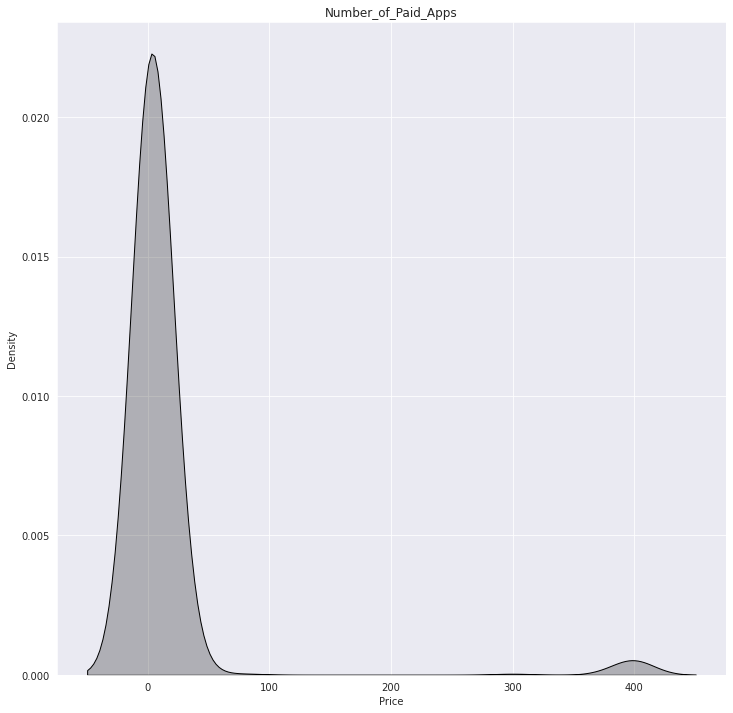

In [ ]:
plt.figure(figsize=(12,12))
sns.kdeplot(df[df['Type']=='Paid']["Price"], color = 'black', shade = True,)
sns.set_style('darkgrid')
plt.title('Number_of_Paid_Apps')
plt.show()


*According to the graph above, there are 645 paid apps overall, with the majority of them costing between 0 and 100 rupees, and less of them are priced between 300 and 400 rupees.*






**<h3>What are the Top 10 Expensive_Apps</h3>**

In [ ]:
df[df['Type']== "Free"].count()

App               7588
Category          7588
Rating            7588
Reviews           7588
Size              6482
Installs          7588
Type              7588
Price             7588
Content Rating    7588
Genres            7588
Last Updated      7588
Current Ver       7588
Android Ver       7588
dtype: int64

In [ ]:
Top10_expensive_app  = df[df['Type']=="Paid"].sort_values(by = 'Price', ascending = False)[:10]

In [ ]:
Top10_expensive_app[['Category' ,'App','Type' , 'Price']]

,Category,App,Type,Price
3305,LIFESTYLE,I'm Rich - Trump Edition,Paid,400.00
4109,FINANCE,I am rich (Most expensive app),Paid,399.99
3175,FAMILY,most expensive app (H),Paid,399.99
4103,FINANCE,I am Rich!,Paid,399.99
4114,FINANCE,I am Rich,Paid,399.99
4107,FAMILY,I Am Rich Pro,Paid,399.99
4101,FINANCE,I Am Rich Premium,Paid,399.99
4104,FINANCE,I am rich(premium),Paid,399.99
4118,FINANCE,I AM RICH PRO PLUS,Paid,399.99
4099,FAMILY,I am Rich Plus,Paid,399.99


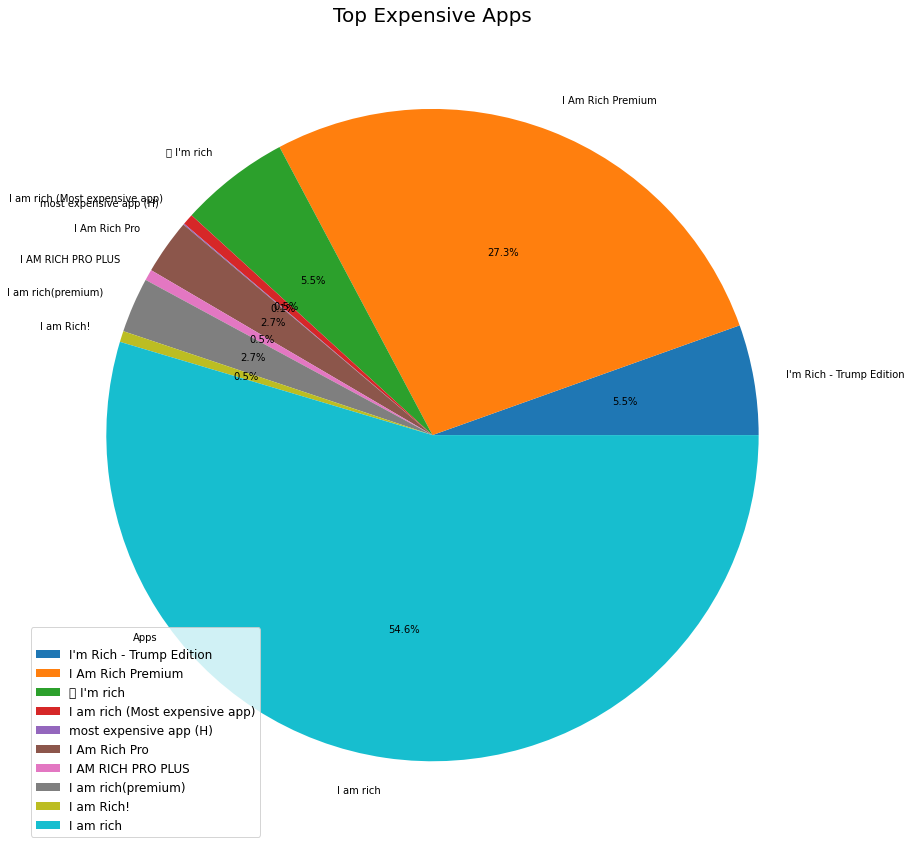

In [ ]:
plt.figure(figsize=(15,15));
plt.pie(Top10_expensive_app.Installs, explode=None, labels=Top10_expensive_app.App, autopct='%1.1f%%', startangle=0)
plt.title('Top Expensive Apps',size = 20)
plt.legend(Top10_expensive_app.App, 
           loc="lower left",
           title="Apps",
           fontsize = "large")

*We can see from the following graph that the Google Play Store's most expensive app is "I am Rich," followed by "I am Rich Premium."*



**<h3>To find out if there is a correlation between ratings and price would be fascinating. How do app store prices impact ratings</h3>**

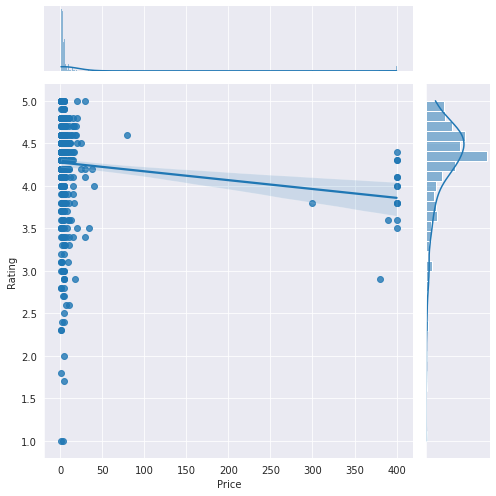

In [ ]:
## Plotting Joint plot 
Rating_vs_apps = df[df['Type'] == 'Paid']

# price vs. rating
Relation = sns.jointplot(x = Rating_vs_apps['Price'], y = Rating_vs_apps['Rating'], kind='reg' , height=7)
     

*As we have seen the correlation between price and rating in the above graph  found that The majority of highly rated apps have best pricing between ~1 
to 30 . there are very few Apps above $20*

**<h3>How does the size of the app affect the ratings and number of installs?</h3>**



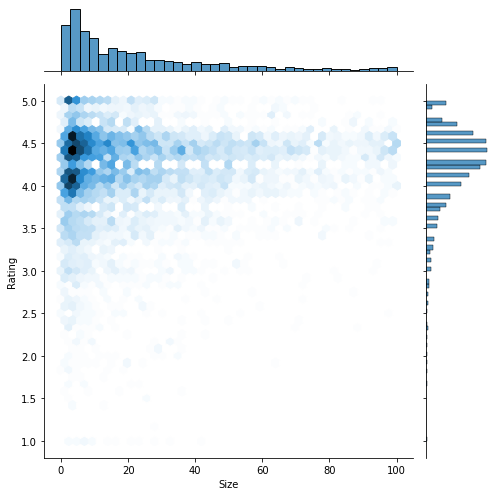

In [ ]:
## Size vs Rating 
Size_vs_rating = sns.jointplot(x = df['Size'], y = df['Rating'], kind = 'hex', height=7)

*There is a relationship between size and rating, and trends can be seen between them.*
*We discover that the bulk of highly rated apps (rated over 4) fall between 2 MB and 40 MB in size.*


**<h3>To find any observable patterns or links between the features, create a pairwise plot of all the numerical interactions.</h3>**

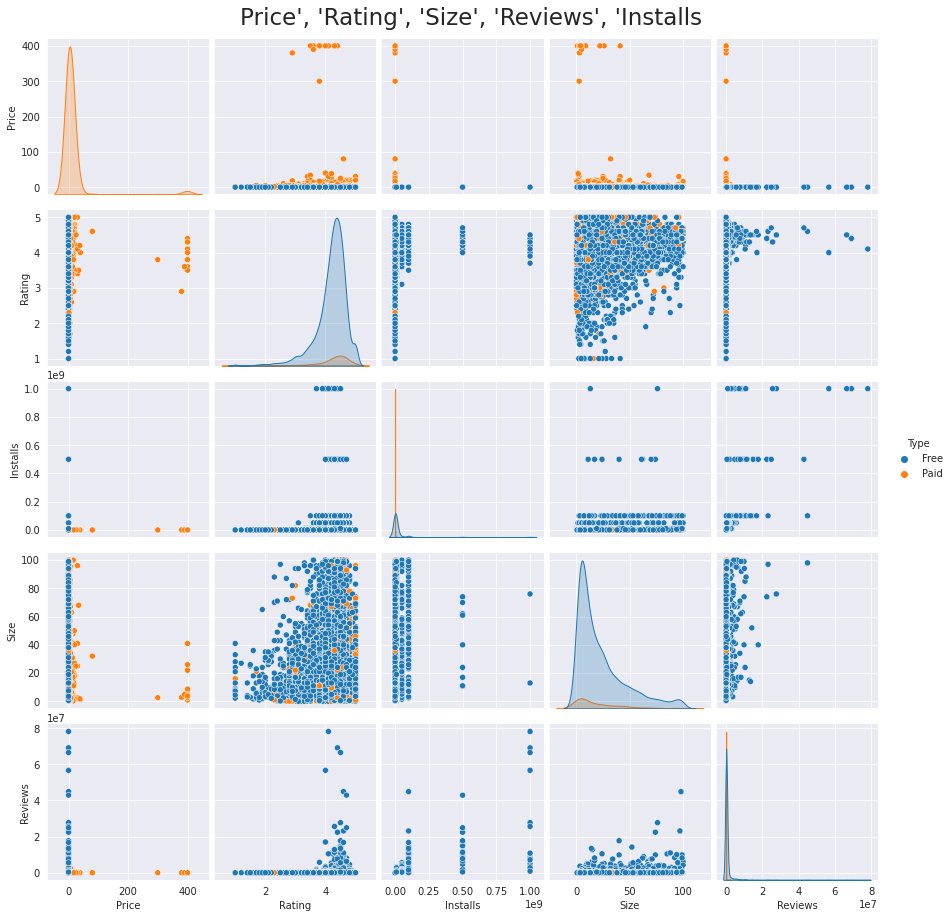

In [ ]:
## Creating Paring plot to observe Correlation 
Pair = sns.pairplot(df, vars =['Price', 'Rating', 'Installs', 'Size', 'Reviews', ],kind= 'scatter', hue='Type',)
Pair.fig.suptitle( "Price', 'Rating', 'Size', 'Reviews', 'Installs", y=1.02, fontsize=23)
plt.show()


In [47]:
heat_corr = df.describe().corr()

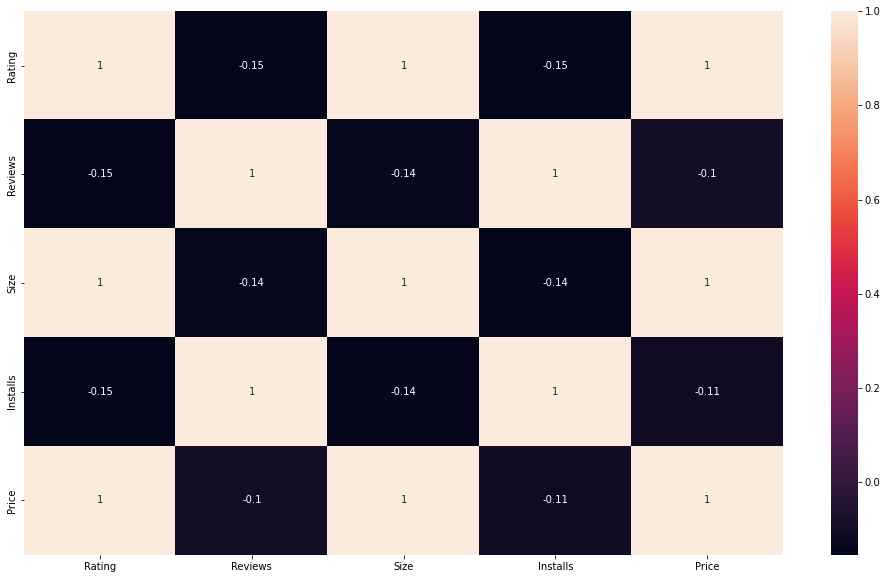

In [48]:
# Heat_map
plt.figure(figsize=(17,10))
corr= heat_corr.corr()
sns.heatmap(heat_corr, annot=True,)
plt.show()

*There is a 0.15 moderately favourable relation between both the number of reviews and installations. That implies that users are more inclined to download an app if so many people have evaluated it.*

**<h1>User_Review_Analysis</h1>**

In [49]:
# now lets merging both the data frame
merged_df= df.merge(reviews_df,how="inner",on="App")

In [61]:
print("the total number of unique App is ", len(merged_df['App'].unique()))

the total number of unique App is  816


In [ ]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
reviews_df[reviews_df['Sentiment']=='Positive']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


**<h3>What is the Type of review of sentiment distribution</h3>**

In [ ]:
Sentiment_Analysis = merged_df.groupby(['Category','Sentiment']).size().reset_index(name = 'Sentiment Count')
Sentiment_Analysis['log_sentiment_count'] = np.log2(Sentiment_Analysis['Sentiment Count'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The distribution of sentiment type by category')

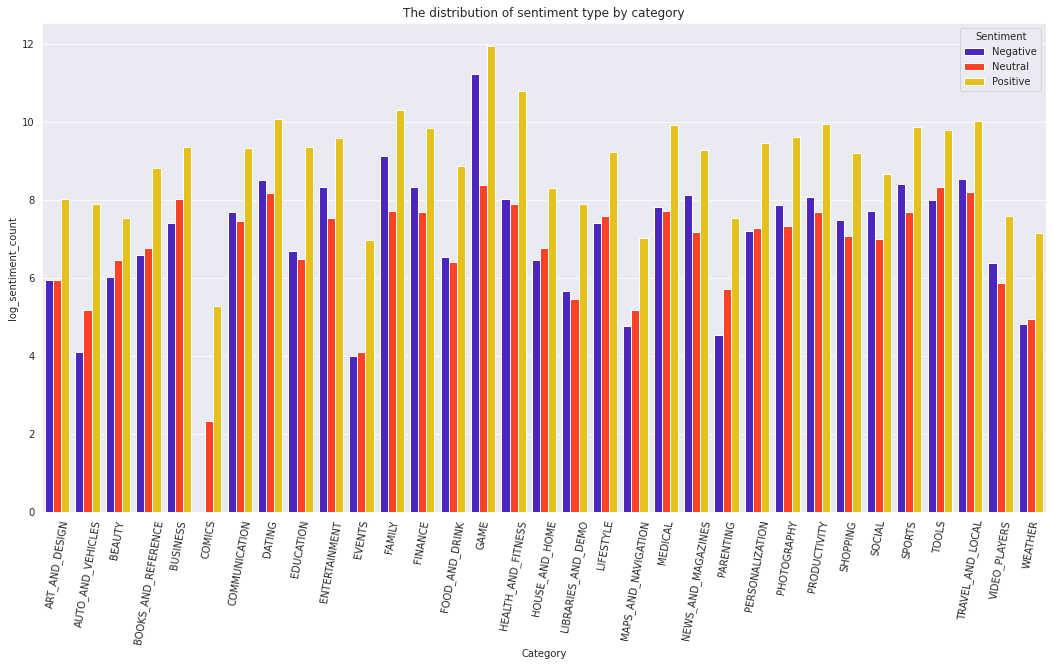

In [ ]:
plt.figure(figsize=(18,9))
sns.barplot('Category', 'log_sentiment_count', data=Sentiment_Analysis, hue='Sentiment', palette = 'CMRmap',  saturation = 10);
plt.xticks(rotation=80)
plt.title("The distribution of sentiment type by category")

*The(Health and Fitness) category do the best with more than 85% positive reviews, according to our depiction of the percentage of positive, negative, and neutral reviews for each category. However, (game) category have a larger proportion of both favourable and negative reviews.*

In [ ]:
Sentiment_Analysis = merged_df.groupby(['Category','Sentiment']).count().reset_index()

In [ ]:
Sentiment_Analysis

,Category,Sentiment,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity
0,ART_AND_DESIGN,Negative,61,61,61,58,61,61,61,61,61,61,61,61,61,61,61
1,ART_AND_DESIGN,Neutral,62,62,62,54,62,62,62,62,62,62,62,62,62,62,62
2,ART_AND_DESIGN,Positive,259,259,259,233,259,259,259,259,259,259,259,259,259,259,259
3,AUTO_AND_VEHICLES,Negative,17,17,17,11,17,17,17,17,17,17,17,17,17,17,17
4,AUTO_AND_VEHICLES,Neutral,36,36,36,20,36,36,36,36,36,36,36,36,36,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,VIDEO_PLAYERS,Neutral,58,58,58,38,58,58,58,58,58,58,58,58,58,58,58
95,VIDEO_PLAYERS,Positive,190,190,190,123,190,190,190,190,190,190,190,190,190,190,190
96,WEATHER,Negative,28,28,28,9,28,28,28,28,28,28,28,28,28,28,28
97,WEATHER,Neutral,31,31,31,17,31,31,31,31,31,31,31,31,31,31,31


**<h3>Now Let's analyze the different review sentiment categories in percentage terms.</h3>**

In [ ]:
# sentiment Analysis in percentage
index = merged_df['Sentiment'].value_counts(sort = True).index
Sentiment = merged_df['Sentiment'].value_counts()


Text(0.5, 1.0, ' showing the percentage of Review Sentiments')

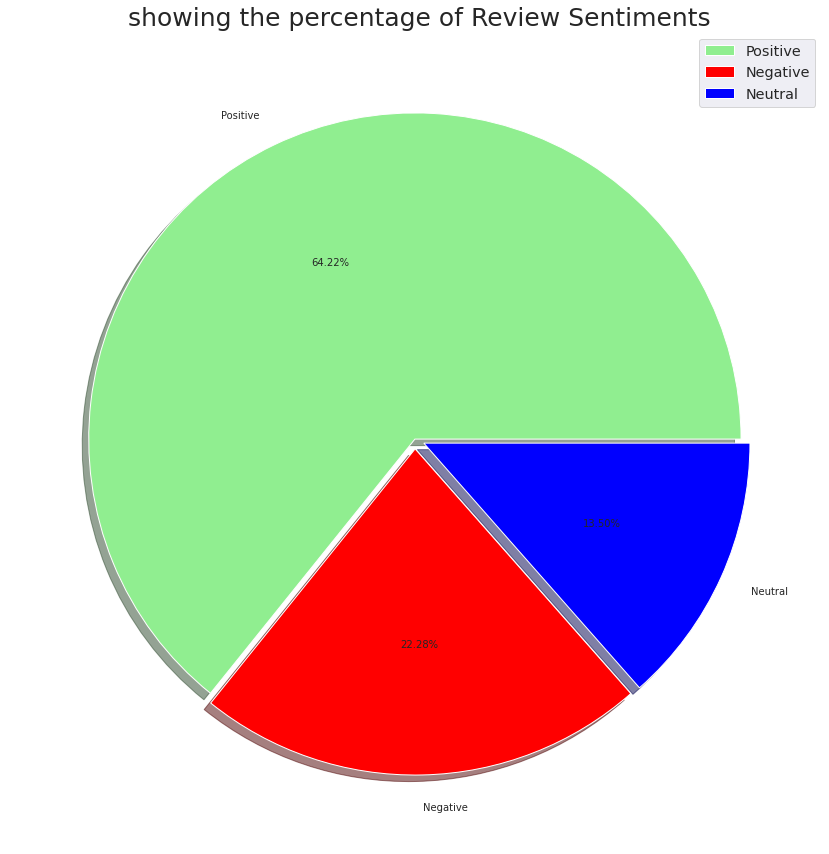

In [ ]:
plt.figure(figsize=(15,15))
labels = index 
colors = ['lightgreen', 'red', 'Blue']
plt.pie(Sentiment, labels=index, shadow=True, autopct="%.2f%%", explode =  (0,0.03,0.03), colors=colors )
plt.legend(fontsize = 'x-large')
plt.title(' showing the percentage of Review Sentiments', fontsize=25)




Positive reviews outnumber negative and neutral ones, as can be seen from the plot above, by a significant margin.

*Positive Reviews is* **64.22%.**

*negative Reviews is* **22.28%.**

*Netural Reviews is* **13.50.**

In [ ]:
Top10_positive_review = reviews_df[reviews_df['Sentiment']=='Positive'].T

In [ ]:
Top10_positive_review

,0,1,3,4,5,6,10,11,12,13,...,64191,64192,64198,64207,64209,64217,64221,64222,64223,64227
App,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,...,Hotwire Hotel & Car Rental App,Hotwire Hotel & Car Rental App,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property
Translated_Review,I like eat delicious food. That's I'm cooking ...,This help eating healthy exercise regular basis,Works great especially going grocery store,Best idea us,Best way,Amazing,good you.,Useful information The amount spelling errors ...,"Thank you! Great app!! Add arthritis, eyes, im...",Greatest ever Completely awesome maintain heal...,...,"Very simple, straight forward, good ui....even...",Great deals,It's waste app... Most properties 2017... And ...,Good,Awesome app.. But prices date? Awesome app. Gi...,"I able set range 1cr, scroll space 0-1cr range...",Everything old stuff neither clear sold proper...,Most ads older many agents ..not much owner po...,"If photos posted portal load, fit purpose. I'm...",I property business got link SMS happy perform...
Sentiment,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
Sentiment_Polarity,1.0,0.25,0.4,1.0,1.0,0.6,0.7,0.2,0.75,0.992188,...,0.35,0.8,0.266667,0.7,0.509375,0.233333,0.021591,0.173333,0.225,0.8
Sentiment_Subjectivity,0.533333,0.288462,0.875,0.3,0.3,0.9,0.6,0.1,0.875,0.866667,...,0.491071,0.75,0.375,0.6,0.511458,0.55,0.25947,0.486667,0.447222,1.0


**<h3> What are the top_10 Positive Reviews Apps</h3>**

In [ ]:
Top10_positive_review = reviews_df[reviews_df['Sentiment']=='Positive'].T

Text(0.5, 0, 'The total amount of positive reviews')

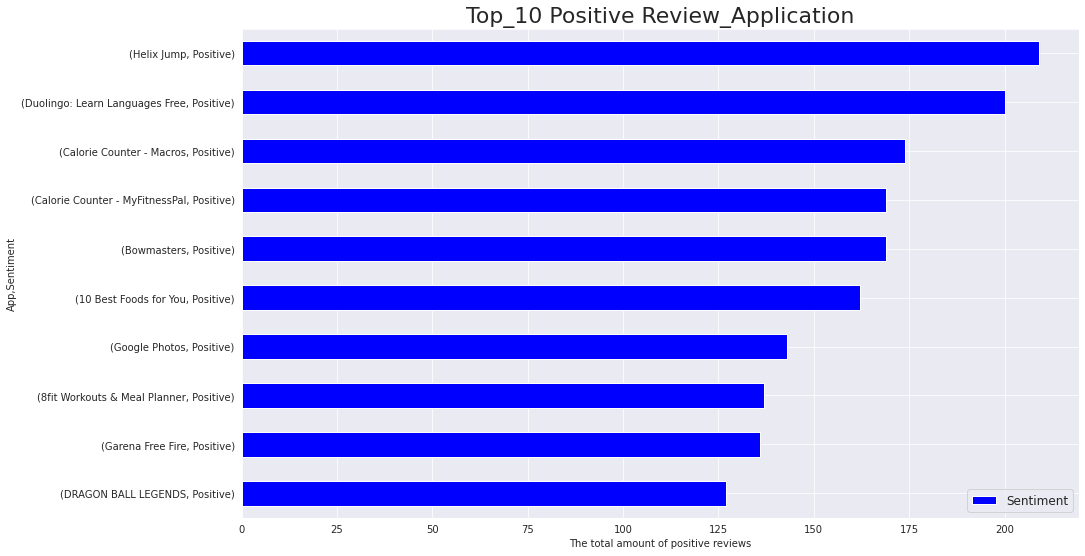

In [ ]:
## Creating bar plot 
Top10_positive_review.groupby('App')['Sentiment'].value_counts().sort_values(ascending = False)[:10].plot.barh(figsize=(15,9),color = 'blue',).invert_yaxis()
##Setting title 
plt.title('Top_10 Positive Review_Application',size = 22)
##background Style
sns.set_style('darkgrid')
## legend  
plt.legend(fontsize = 'large')
##setting Xlabel 
plt.xlabel('The total amount of positive reviews')

*We can see from the graph above that the apps with the most positive user reviews are the Helix Jump, Duolingo: Learn Language Free, and Calorie Counter.*

**<h3> What are the top_10 Negative Reviews Apps</h3>**

In [ ]:
Neg_review = reviews_df[reviews_df[ 'Sentiment']== "Negative"]

In [ ]:
Neg_review

Text(0.5, 0, 'The total amount of Negative reviews')

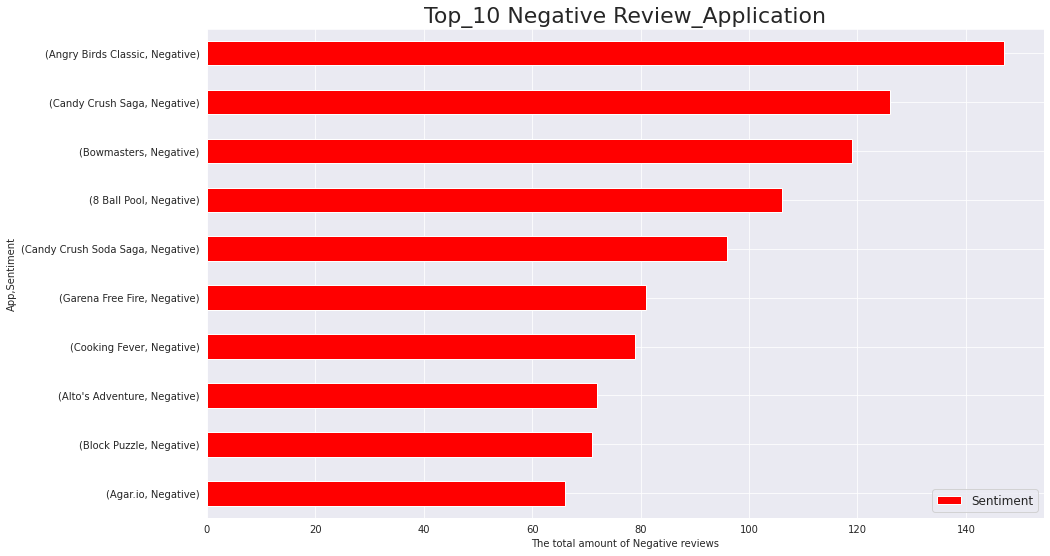

In [ ]:
## Creating bar plot 
Neg_review.groupby('App')['Sentiment'].value_counts().sort_values(ascending = False)[:10].plot.barh(figsize=(15,9), color ='darkRed').invert_yaxis()
##Setting title 
plt.title('Top_10 Negative Review_Application',size = 22)
##background Style
sns.set_style('darkgrid') 
## legend
plt.legend(fontsize = 'large')
## set Xlabel
plt.xlabel('The total amount of Negative reviews')

*As can be seen from the graph above, the apps with the most Negative reviews are (Angry Bird), (candy crush saga) ,(Bowmasters)*

**<h3>Sentiment Polarity Analysis</h3>**

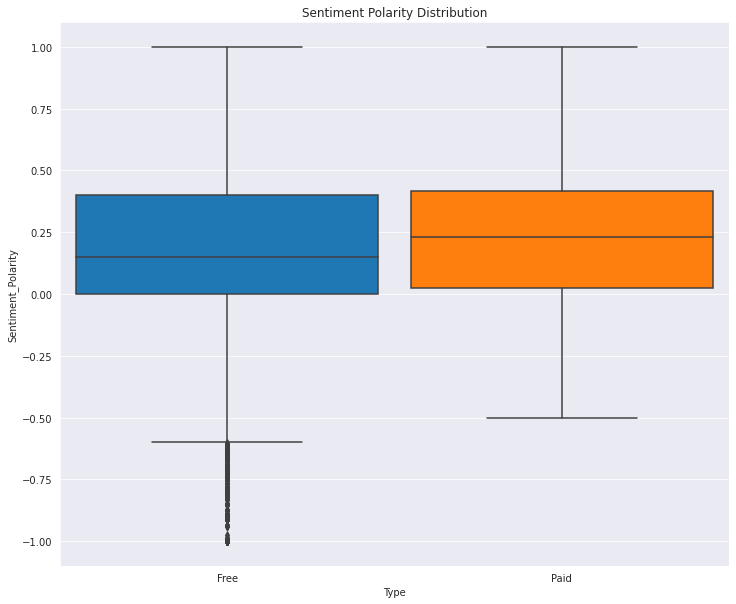

In [ ]:
## sentiment polarity and free/paid apps
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df,width=0.9 , saturation=5)
title = ax.set_title('Sentiment Polarity Distribution') 
sns.set_style("darkgrid")


*user reviews for both paid and free apps are analysed by plotting the sentiment polarity scores.The outliers on the negative y-axis in the following graph show how unpleasant remarks are more common for free apps, but paying customers are more patient.*




##**Conclusions**

1.   As observed in the above plots, the categories for Family, Games, and Tools contain the greatest number of application-based categories in the Google Play Store.
2. Everyone category has the most number of apps as we have seen from graph . in the google playstore the bulk of apps (81.8%) are universally usable different age restrictions apply to remaining apps . 
3. According to the above graph, the majority of the apps in the Google Play Store have ratings between 3.5 and 4.8, however the average rating for all apps is relatively high at 4.3.
4. We have found from the analysis that the two categories of applications with the greatest quality and 50% of apps with ratings greater than 4.5 are health and fitness and book and reference applications, while the dating category is lower than Average
5. it is concluded that all the top four category has average rating between 4 to 4.8
6. We found that The majority of installed apps fall under the categories of games, communication, and tools
7. The bulk of installed apps, according to  research, fell into the game, communication, and tool categories, with Temple Run 2, Candy Crush Saga, and Subway Surfers receiving the most installations in the game category.
8. The game and family Category includes the majority of big Applications (>50MB). Despite this, the excellent ratings for these hefty apps suggest that they are hefty for a reason.
9
10. In the Google Play store, 92.6%  of the apps are for free, and 7.4% are for a fee. It signifies that the majority of apps in specific categories on the Play Store were available for free download. There are several apps that are paid simultaneously.
11. According to the graph above, there are 645 paid apps overall, with the majority of them costing between 0 and 100 rupees, and less of them are priced between 300 and 400 rupees.
12. I am Rich is the most costly app in the Google Play Store, followed by I am Rich Premium, as per the visualisation.
13.  found that The majority of highly rated apps have best pricing between ~1 to 30 . there are very few Apps above $20
14. we concluded from visualisation The paid apps have tiny size applications between 2 MB and 40 MB, and they are highly rated. (There is a relationship between size and rating, and trends can be seen between them. We discover that the bulk of highly rated apps (rated over 4) fall between 2 MB and 40 MB in size.)
15. There is a 0.15 moderately favourable relation between both the number of reviews and installations. That implies that users are more inclined to download an app if so many people have evaluated it.
16. we found that health and fitness category has achieved highest number positive reviews followed by game category , game is the category which contain larger amount of reviews but they have huge portion of both positive and negative sentiments 
17. Positive reviews outnumber negative and neutral ones, as can be seen from the plot above, by a significant margin.
18. Calorie Counter, Duolingo: Learn Language Free, and Helix Jump have received the most favourable user reviews. the most unfavourable reviews received by games Candy Crush Saga and Angry Birds (Bowmasters)
19. The outliers on the negative y-axis in the following graph show how unpleasant remarks are more common for free apps, but paying customers are more patient.